# Libraries

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Initilizing Parameters

In [23]:
p_0 = 0.65
p_1 = 1 - p_0
m_01 = np.array([3, 0])
c_01 = np.array([[2, 0], [0, 1]])
m_02 = np.array([0, 3])
c_02 = np.array([[1, 0], [0, 2]])
m_1 = np.array([2, 2])
c_1 = np.array([[1, 0], [0, 1]])
w1 = 0.5
w2 = w1 
print(c_01)

[[2 0]
 [0 1]]


# Generating Samples
p(x) = P(L = 0)p(x|L = 0) + P(L = 1)p(x|L = 1)

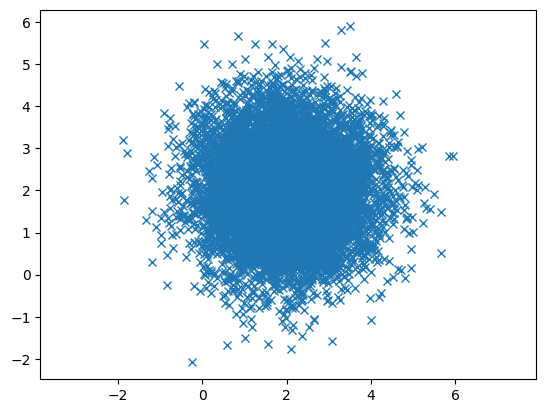

In [10]:
import matplotlib.pyplot as plt
import numpy as np
x, y = np.random.multivariate_normal(m_1, c_1, 10000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()